In [1]:
import numpy as np

from matplotlib import pyplot as plt

In [2]:
from ZeNBu.zenbu_rsd import Zenbu_RSD

In [3]:
k, p = np.loadtxt("ZeNBu/Pk_Planck15_Table4.txt", unpack=True)
zen  = Zenbu_RSD(k, 0.5*p, jn = 15)

In [4]:
# Let's start in real space:
f, nu = 0.8, 0.0
zen.make_ptable(f, nu, kmin=3e-3, kmax = 1.0, nk=50)

In [5]:
# Let's explicitly list the components
# Note that the cross spectra are multiplied by a factor of one half.

kv = zen.pktables[0.0][:,0]

spectra = {\
          r'$(1,1)$':zen.pktable[:,1],\
          r'$(1,b_1)$':zen.pktable[:,2], r'$(b_1,b_1)$': zen.pktable[:,3],\
          r'$(1,b_2)$':zen.pktable[:,4], r'$(b_1,b_2)$': zen.pktable[:,5],  r'$(b_2,b_2)$': zen.pktable[:,6],\
          r'$(1,b_s)$':zen.pktable[:,7], r'$(b_1,b_s)$': zen.pktable[:,8],  r'$(b_2,b_s)$': zen.pktable[:,9], r'$(b_s,b_s)$':zen.pktable[:,10],\
          }

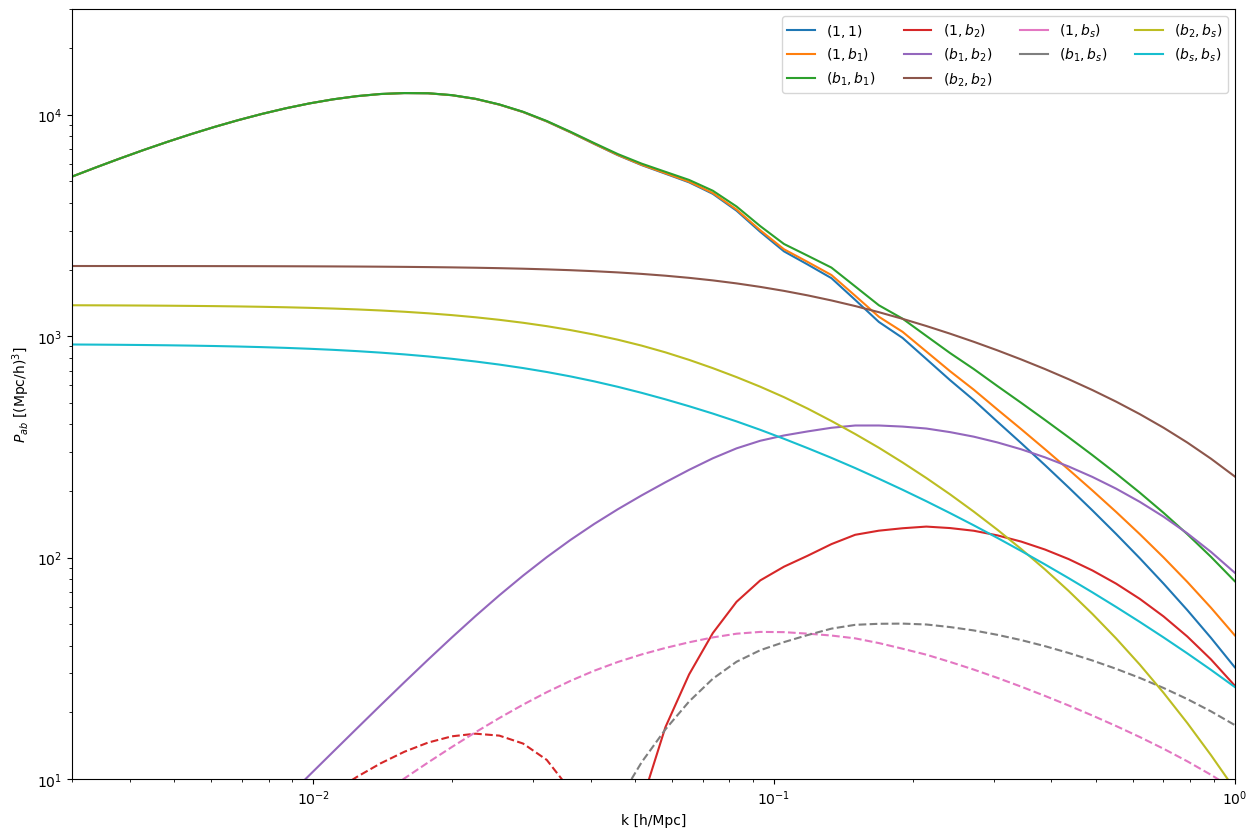

In [6]:
# Plot some stuffs
plt.figure(figsize=(15,10))

spec_names = spectra.keys()

for ii, spec_name in enumerate(spec_names):    
    plt.loglog(kv, spectra[spec_name],'C'+str(ii), label=spec_name)
    plt.loglog(kv, -spectra[spec_name],'C'+str(ii)+'--')

plt.xlim(3e-3, 1)    
plt.ylim(10,3e4)
plt.legend(ncol=4)
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$P_{ab}$ [(Mpc/h)$^3$]')  
plt.show()

In [7]:
# Compare to real-space zenbu:
from ZeNBu.zenbu import Zenbu

ren  = Zenbu(k, 0.5*p, jn = 15)
ren.make_ptable(kmin=3e-3, kmax = 1.0, nk=50)

# Let's explicitly list the components
# Note that the cross spectra are multiplied by a factor of one half.

kv = ren.pktable[:,0]

rpectra = {\
          r'$(1,1)$':ren.pktable[:,1],\
          r'$(1,b_1)$':ren.pktable[:,2], r'$(b_1,b_1)$': ren.pktable[:,3],\
          r'$(1,b_2)$':ren.pktable[:,4], r'$(b_1,b_2)$': ren.pktable[:,5],  r'$(b_2,b_2)$': ren.pktable[:,6],\
          r'$(1,b_s)$':ren.pktable[:,7], r'$(b_1,b_s)$': ren.pktable[:,8],  r'$(b_2,b_s)$': ren.pktable[:,9], r'$(b_s,b_s)$':ren.pktable[:,10],\
          }

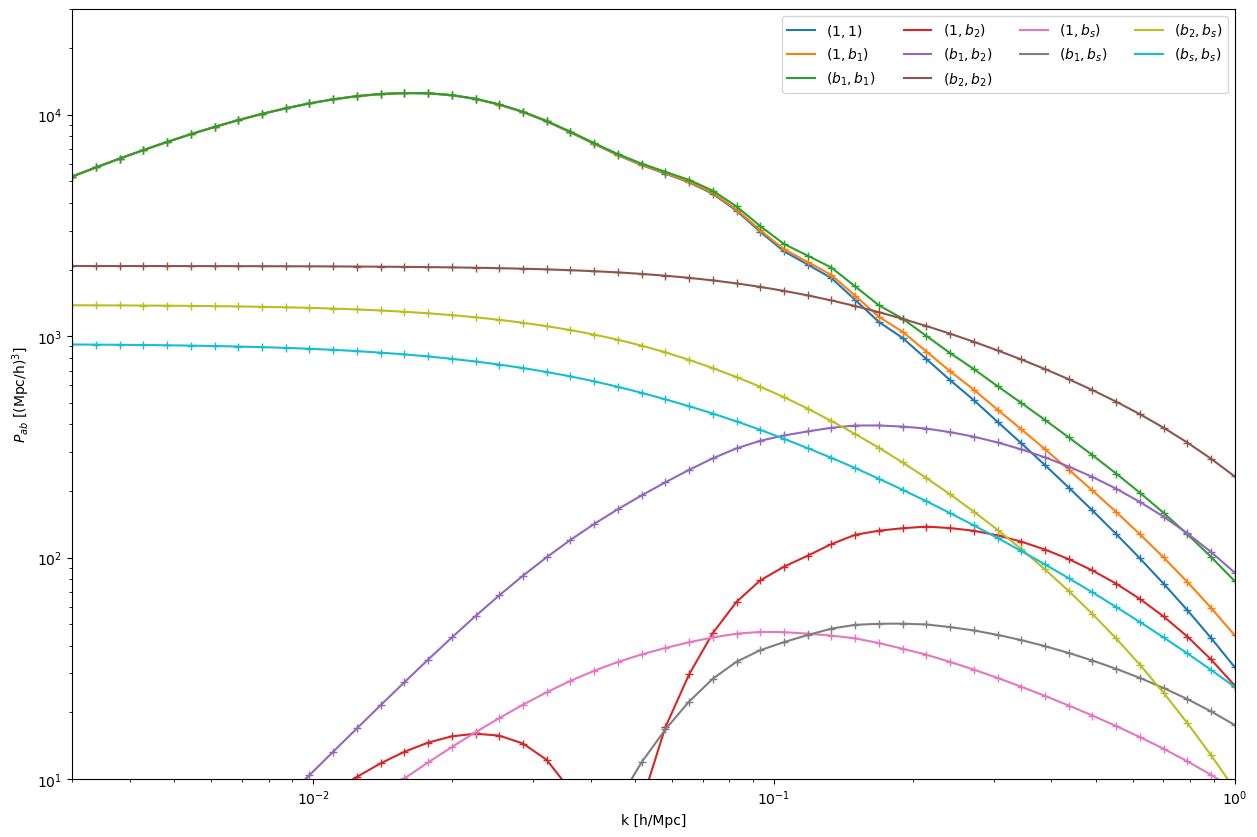

In [8]:
# Plot some stuffs
plt.figure(figsize=(15,10))

spec_names = spectra.keys()

for ii, spec_name in enumerate(spec_names):    
    plt.loglog(kv, np.abs(spectra[spec_name]),'C'+str(ii), label=spec_name)
    #plt.loglog(kv, -spectra[spec_name],'C'+str(ii)+'--')
    plt.loglog(kv, np.abs(rpectra[spec_name]),'C'+str(ii)+'+')

plt.xlim(3e-3, 1)    
plt.ylim(10,3e4)
plt.legend(ncol=4)
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$P_{ab}$ [(Mpc/h)$^3$]')  
plt.show()

(-0.01, 0.01)

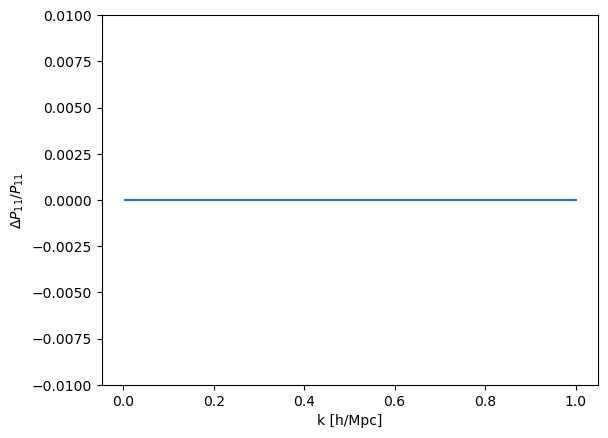

In [9]:
plt.plot(kv, spectra[r'$(1,1)$']/rpectra[r'$(1,1)$'] - 1)

plt.ylabel(r'$\Delta P_{11}/ P_{11}$')
plt.xlabel('k [h/Mpc]')

plt.ylim(-0.01,0.01)

(-0.01, 0.01)

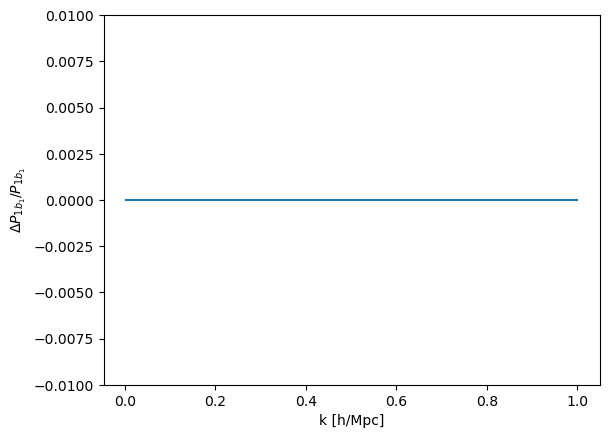

In [10]:
plt.plot(kv, spectra[r'$(1,b_1)$']/rpectra[r'$(1,b_1)$'] - 1)

plt.ylabel(r'$\Delta P_{1 b_1}/ P_{1 b_1}$')
plt.xlabel('k [h/Mpc]')

plt.ylim(-0.01,0.01)

(-0.01, 0.01)

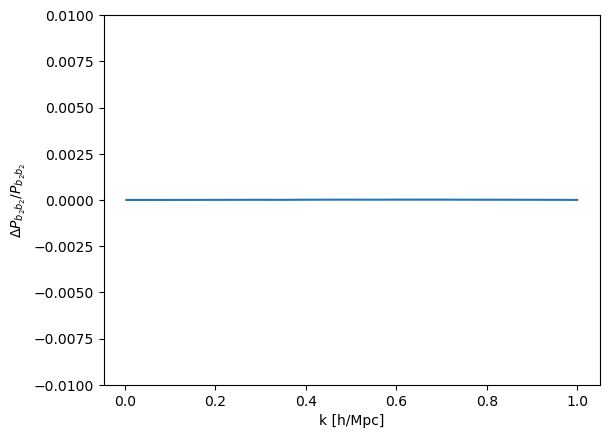

In [11]:
plt.plot(kv, spectra[r'$(b_2,b_2)$']/rpectra[r'$(b_2,b_2)$'] - 1)

plt.ylabel(r'$\Delta P_{b_2 b_2}/ P_{b_2 b_2}$')
plt.xlabel('k [h/Mpc]')

plt.ylim(-0.01,0.01)

In [12]:
# Make Multipoles
zen.make_pltable(f, ngauss=4, kmin=3e-3, kmax = 1.0, nk=50)

0

Text(0, 0.5, '$k P_{(1,1)}^\\ell$')

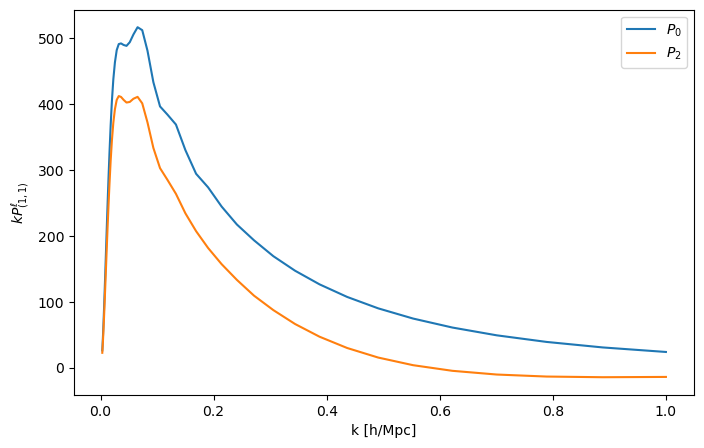

In [13]:
plt.figure(figsize=(8,5))

plt.plot(kv, kv * zen.p0ktable[:,0], label=r'$P_0$')
plt.plot(kv, kv * zen.p2ktable[:,0], label=r'$P_2$')

plt.legend()

plt.xlabel('k [h/Mpc]')
plt.ylabel('$k P_{(1,1)}^\ell$')